In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns

In [3]:
np.__version__

'1.22.3'

In [4]:
path = Path('../data/storm/wordcount/2')
files = [f for f in path.rglob('*') if f.is_file()]

In [5]:
print(f'files #: {len(files)}')

files #: 88


In [20]:
d = {}

In [6]:
from scipy.stats import norm, kstest
import math
import pylab
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
import pandas

In [22]:
def qqplot(data):
    #d = norm.rvs(size=1000)
    sm.qqplot(data, line='45')
    pylab.show()
    
def boxplot(data):
    pandas.Series(data).plot(kind='box')
    
def pd_hist(data):
    pandas.Series(data).hist()

def kolmogorov_test(data):
    ks_statistic, p_value = kstest(data, 'norm')
    print(ks_statistic, p_value)
    
def st_lilliefors(data):
    print(lilliefors(data))
    
from scipy.stats import shapiro
def shapiro_wilk(data):
    print(shapiro(data))

In [23]:
def percentile(data, file):
    print(f'10: {np.percentile(data, 10)}', file=file)
    print(f'25: {np.percentile(data, 25)}', file=file)
    print(f'50: {np.percentile(data, 50)}', file=file)
    print(f'75: {np.percentile(data, 75)}', file=file)
    print(f'90: {np.percentile(data, 90)}', file=file)
    print(f'95: {np.percentile(data, 95)}', file=file)
    print(f'97.5: {np.percentile(data, 97.5)}', file=file)
    print(f'99: {np.percentile(data, 99)}', file=file)
    print(f'99.5: {np.percentile(data, 99.5)}', file=file)
    print(f'99.75: {np.percentile(data, 99.75)}', file=file)
    print(f'99.8: {np.percentile(data, 99.8)}', file=file)
    print(f'99.85: {np.percentile(data, 99.85)}', file=file)
    print(f'99.99: {np.percentile(data, 99.99)}', file=file)
    print(f'99.999: {np.percentile(data, 99.999)}', file=file)
    
def percentile(data):
    print(f'10: {np.percentile(data, 10)}')
    print(f'25: {np.percentile(data, 25)}')
    print(f'50: {np.percentile(data, 50)}')
    print(f'75: {np.percentile(data, 75)}')
    print(f'90: {np.percentile(data, 90)}')
    print(f'95: {np.percentile(data, 95)}')
    print(f'97.5: {np.percentile(data, 97.5)}')
    print(f'99: {np.percentile(data, 99)}')
    print(f'99.5: {np.percentile(data, 99.5)}')
    print(f'99.75: {np.percentile(data, 99.75)}')
    print(f'99.8: {np.percentile(data, 99.8)}')
    print(f'99.85: {np.percentile(data, 99.85)}')
    print(f'99.99: {np.percentile(data, 99.99)}')
    print(f'99.999: {np.percentile(data, 99.999)}')

In [7]:
parents = {}
for file in files:
    res = int(file.parent.stem.split('_')[1])
    
    if  str(file.parent) not in parents:
        parents[str(file.parent)] = set([str(file)])
    else:
        parents[str(file.parent)].add(str(file))

In [25]:
print(parents)

{'../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07': {'../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/count3.txt', '../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/report4.txt', '../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/spout6.txt', '../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/split5.txt'}, '../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10': {'../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/report4.txt', '../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/spout6.txt', '../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/split5.txt', '../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/count3.txt'}, '../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36': {'../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/count3.txt', '../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/report4.txt', '../data/storm/wordcount/wc_

In [8]:
def _get_rough_info(data):
    return [np.percentile(data, i) for i in range(101)]

def binary_search(data, start, max_iter=16):
    #if step > pow(2, -8):
    #    return None
    pivot = 1/2
    step = 1/4
    while max_iter:
        v = np.percentile(data, start)
        v2 = np.percentile(data, start + pivot)
        
        if v2 / v > 2:
            pivot -= step
        else:
            pivot += step
            max_iter -=1
        
        step /= 2
    return start + pivot
        #max_iter -= 1
    
    
    
    #if v2 / v > 2:
        


def get_stable_data(data, step=0.001):
    ret = {}
    data = _get_rough_info(data)
    points = []
    for i in range(len(data) - 1):
        if data[i+1] / data[i] > 2:
            points.append(i)
    
    ret['rough_info'] = data
    ret['points'] = points
    ret['point_details'] = {}
    
    for p in points:
        ret['point_details'][f'({p}, {p+1})'] = f'{data[p+1] / data[p]} ({data[p]}, {data[p+1]}), pivot: {binary_search(data, p)}'
    
    return ret

In [27]:
insight = {}

In [28]:
f2 = open('../log', 'a+')
unit = 1000000
for key in parents:
    print(key)
    res = Path(key).stem.split('_')[1]
    insight[key] = {
        'report': {},
        'count': {},
        'split': {},
        'spout': {}
    }
    
    for file in parents[key]:
        print(f'  {file}')
        temp_dict = {}
        file = Path(file)      
        
        #if not file.stem.__contains__('spout'):
        #    continue
        
        with file.open('r') as f:
         
            pdata = []
            idata = []
            lines = f.readlines()
            for line in lines:
                if 'P:' in line:
                    d = line[3:]
                    if d != '':
                        pdata.append(int(line[3:]) / unit)
                elif 'I: ' in line:
                    d = line[3:]
                    if d != '':
                        idata.append(int(line[3:]) / unit)
            
            pdata = np.array(pdata).astype(np.float32)
            idata = np.array(idata).astype(np.float32)

        #    print('\n\n\n\n')
        
        tf = Path(file)
        if 'count' in tf.stem:
            insight[key]['count'] = {
                'processing': get_stable_data(pdata)
            }
        elif 'split' in tf.stem:
            insight[key]['split'] = {
                'processing': get_stable_data(pdata)
            }
        elif 'spout' in tf.stem:
            insight[key]['spout'] = {
                'processing': get_stable_data(pdata)
            }
        elif 'report' in tf.stem:
            insight[key]['report'] = {
                'processing': get_stable_data(pdata)
            }
        

../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/count3.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/report4.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/spout6.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/split5.txt
../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/report4.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/spout6.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/split5.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/count3.txt
../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/count3.txt
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/report4.txt
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-

In [40]:
import pickle as pkl
with open('../data/insight.pkl', 'wb') as f:
    pkl.dump(insight, f)

In [39]:
Path().cwd()

PosixPath('/home/ctenhank/project/thesis/metrics/tool')

In [38]:
idx = 0
for key in insight:
    print(key)
    for component in insight[key]:
        print(f'[{idx}] {component}: {insight[key][component]["processing"]["points"]}')
        idx += 1

../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07
[0] report: [99]
[1] count: [99]
[2] split: [98, 99]
[3] spout: [99]
../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10
[4] report: [0, 99]
[5] count: [99]
[6] split: [95, 96, 99]
[7] spout: [99]
../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36
[8] report: [99]
[9] count: [99]
[10] split: [97, 99]
[11] spout: [99]
../data/storm/wordcount/wc_55_100_1_1_1_1_2022-04-15_08:22:45
[12] report: [99]
[13] count: [99]
[14] split: [94, 95, 99]
[15] spout: [0, 99]
../data/storm/wordcount/wc_65_100_1_1_1_1_2022-04-15_10:23:02
[16] report: [99]
[17] count: [99]
[18] split: [0, 95]
[19] spout: [99]
../data/storm/wordcount/wc_125_100_1_1_1_1_2022-04-15_21:24:33
[20] report: [99]
[21] count: [99]
[22] split: [0, 97]
[23] spout: [99]
../data/storm/wordcount/wc_130_100_1_1_1_1_2022-04-15_22:24:42
[24] report: [99]
[25] count: [99]
[26] split: [97, 99]
[27] spout: [99]
../data/storm/wordcount/wc_120_100_1_1_1_1_2022-0

In [42]:
with open('../data/insight.pkl', 'rb') as f:
    insight = pkl.load(f)
    print(insight)
    

{'../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07': {'report': {'processing': {'rough_info': [0.00014000000373926014, 0.0001880000054370612, 0.00019200000679120421, 0.00019500000053085387, 0.00019700000120792538, 0.0001990000018849969, 0.0002010000025620684, 0.00020199999562464654, 0.00020399999630171806, 0.00020500000391621143, 0.00020599999697878957, 0.00020799999765586108, 0.00020900000527035445, 0.0002099999983329326, 0.00021100000594742596, 0.00021300000662449747, 0.00021399999968707561, 0.00021499999274965376, 0.00021600000036414713, 0.00021699999342672527, 0.00021899999410379678, 0.00022000000171829015, 0.0002209999947808683, 0.00022200000239536166, 0.00022400000307243317, 0.00022499999613501132, 0.00022699999681208283, 0.0002280000044265762, 0.0002300000051036477, 0.00023099999816622585, 0.00023299999884329736, 0.00023499999952036887, 0.00023600000713486224, 0.00023799999326001853, 0.00023999999393709004, 0.00024300000222865492, 0.00024500000290572643, 0.00024699

In [43]:
def get_pivot_from_insight(insight):
    ret = []
    for key in insight:
        print(f'{key}: {insight[key]}')
        pivot = float(insight[key].split(',')[2].split(':')[1])
        ret.append(pivot)
    return ret
    

In [44]:
def filter_array(arr, k):
    return [e for e in arr if e < k]

../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/count3.txt
count
(99, 100): 648.9105545142281 (0.11450999975204468, 74.30674743652344), pivot: 99.00154342291899
[99.00154342291899]


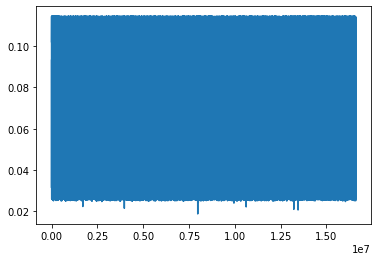

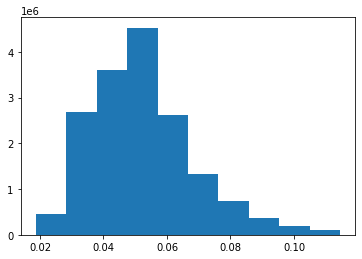

0.05228834163053154 0.016028751100156127
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/report4.txt
report
(99, 100): 83554.60510982666 (0.0005200000014156103, 43.448394775390625), pivot: 99.00001196836445
[99.00001196836445]


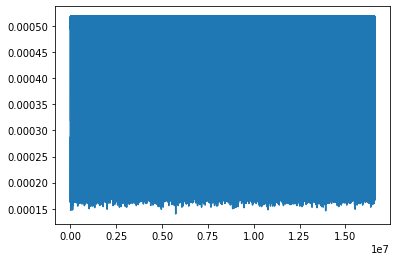

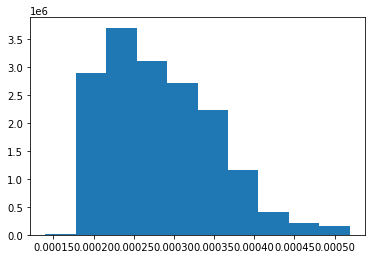

0.0002834140359454208 6.723488193534845e-05
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/spout6.txt
spout
(99, 100): 269.00851874757467 (0.29143571227788995, 78.39868927001953), pivot: 99.0037312246568
[99.0037312246568]


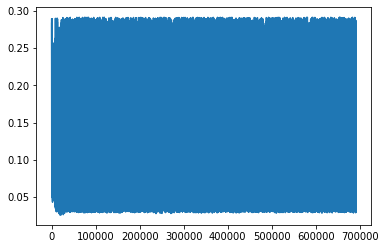

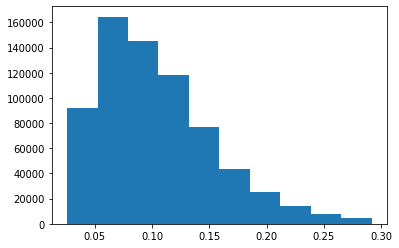

0.10413873869048051 0.049442582873210496
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/split5.txt
split
(98, 99): 10.982425592268546 (3.285685062408472, 36.08479171752928), pivot: 98.10017605348094
(99, 100): 2.2647793346267795 (36.08479171752928, 81.72409057617188), pivot: 99.79065175451797
[98.10017605348094, 99.79065175451797]


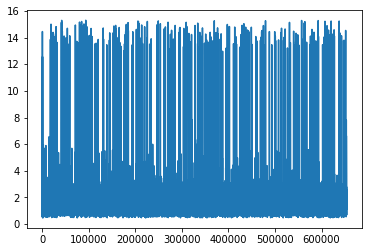

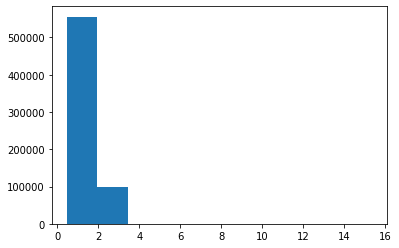

1.4497547116586005 0.5323920504360828
../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/report4.txt
report
(0, 1): 9.29166614875998 (2.4000000848900527e-05, 0.0002229999954579398), pivot: 0.12060302495956421
(99, 100): 107625.27504755527 (0.0007650000043213367, 82.33333587646484), pivot: 99.00000929158408
[0.12060302495956421, 99.00000929158408]


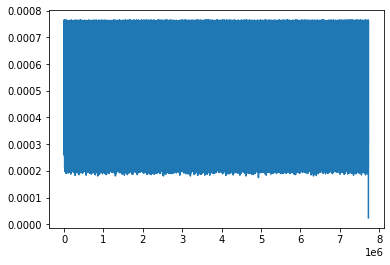

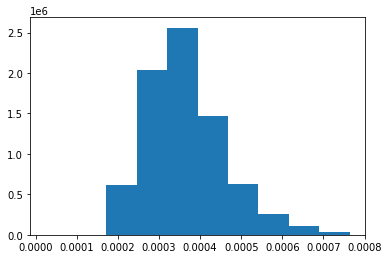

0.00036377263054098683 9.59749013048507e-05
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/spout6.txt
spout
(99, 100): 301.10220404158724 (0.3281954252719883, 98.82036590576172), pivot: 99.00333219811964
[99.00333219811964]


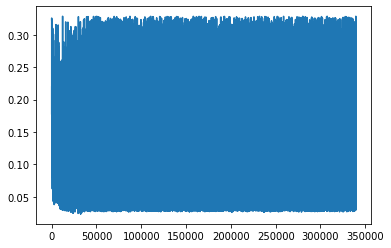

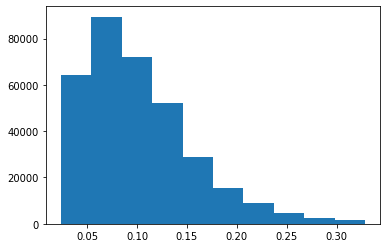

0.10211617870401171 0.05314761494418995
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/split5.txt
split
(95, 96): 6.807478247105462 (2.6467681407928456, 18.017816543579062), pivot: 95.17219177712741
(96, 97): 3.8668749069102217 (18.017816543579062, 69.67264266967774), pivot: 96.34881187113933
(99, 100): 2.310535601468449 (79.22158660888651, 183.04429626464844), pivot: 99.76304680229941
[95.17219177712741, 96.34881187113933, 99.76304680229941]


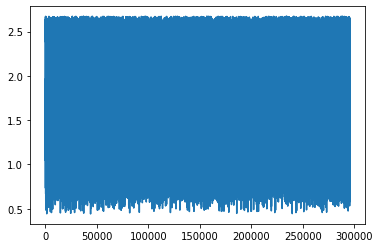

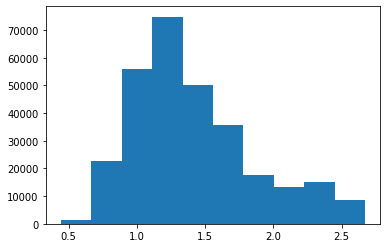

1.4129705695569772 0.44651234798173167
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/count3.txt
count
(99, 100): 827.8589252997675 (0.12317425832152344, 101.97090911865234), pivot: 99.00120939614902
[99.00120939614902]


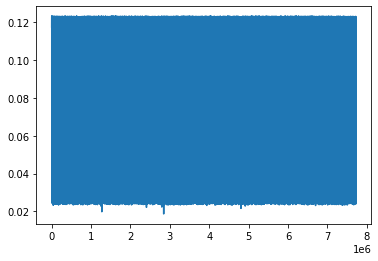

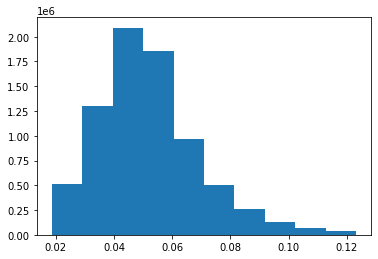

0.05197622785511689 0.01709521814335253
../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/count3.txt
count
(99, 100): 706.0830850512721 (0.12482299655675888, 88.13540649414062), pivot: 99.00141827256994
[99.00141827256994]


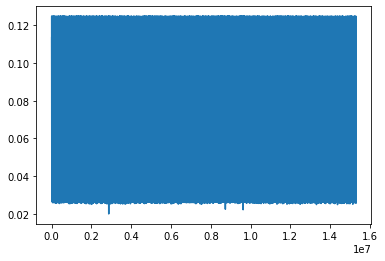

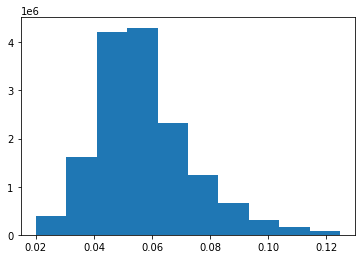

0.0571474266465351 0.01657562372623165
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/report4.txt
report
(99, 100): 67600.76919004871 (0.0006670000148005784, 45.08971405029297), pivot: 99.00001479294991
[99.00001479294991]


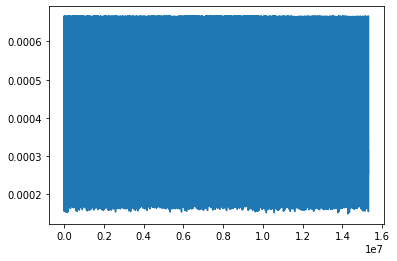

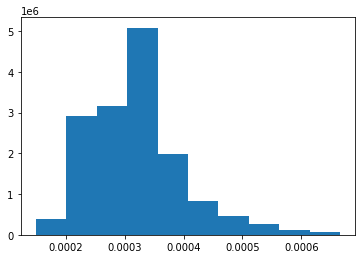

0.000319329431717841 7.901705217446522e-05
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/spout6.txt
spout
(99, 100): 249.7155571430622 (0.2997361728549003, 74.84878540039062), pivot: 99.00402065715753
[99.00402065715753]


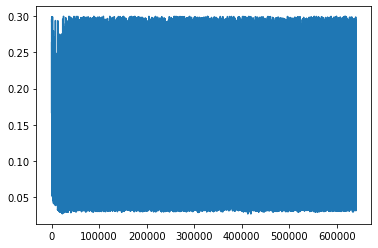

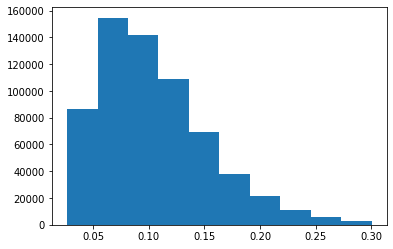

0.10520916837998714 0.04896477962644479
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/split5.txt
split
(97, 98): 7.033062570675437 (2.972543127536775, 20.906081809997392), pivot: 97.16575329564512
(99, 100): 3.66906517586933 (34.93467849731444, 128.1776123046875), pivot: 99.37466305494308
[97.16575329564512, 99.37466305494308]


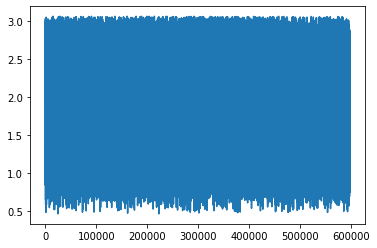

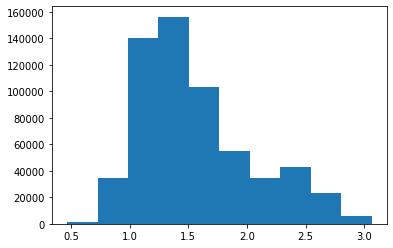

1.559044348520899 0.47995235451503054
../data/storm/wordcount/wc_55_100_1_1_1_1_2022-04-15_08:22:45
  ../data/storm/wordcount/wc_55_100_1_1_1_1_2022-04-15_08:22:45/report4.txt
report
(99, 100): 109663.32356912048 (0.0008329999982379377, 91.34954833984375), pivot: 99.00000911890214
[99.00000911890214]


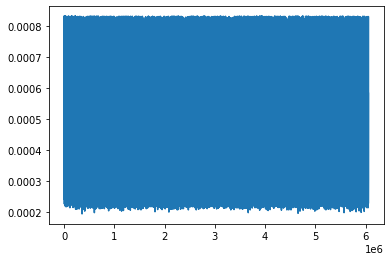

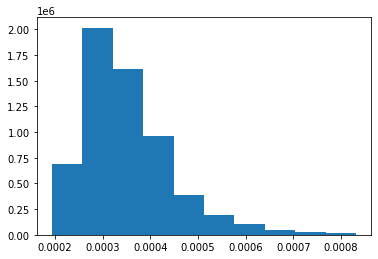

0.00035060539322332324 9.390645803961071e-05
  ../data/storm/wordcount/wc_55_100_1_1_1_1_2022-04-15_08:22:45/count3.txt
count
(99, 100): 840.3797833431762 (0.1265619993209839, 106.36014556884766), pivot: 99.00119135583179
[99.00119135583179]


FileNotFoundError: [Errno 2] No such file or directory: '../data/storm/wordcount/wc_55_100_1_1_1_1_2022-04-15_08:22:45/count3.txt'

In [53]:
# Refine data
lat_insight = {}
unit = 1000000
for key in parents:
    print(key)
    res = Path(key).stem.split('_')[1]
    lat_insight[key] = {}
    
    for file in parents[key]:
        print(f'  {file}')
        temp_dict = {}
        file = Path(file)
        #if not file.stem.__contains__('spout'):
        #    continue
        
        for comp in insight[key]:
            if file.stem.__contains__(comp):
                component = comp
                break
        
        print(component)
        #print(component)
        #print(insight[key][component])
        pivots = get_pivot_from_insight(insight[key][component]['processing']['point_details'])
        pivot = 0
        for p in pivots:
            if p > 50:
                pivot = p
                break
                
        print(pivots)
        with file.open('r') as f:
         
            pdata = []
            idata = []
            lines = f.readlines()
            for line in lines:
                if 'P:' in line:
                    d = line[3:]
                    if d != '':
                        pdata.append(int(line[3:]) / unit)
                elif 'I: ' in line:
                    d = line[3:]
                    if d != '':
                        idata.append(int(line[3:]) / unit)
            
            #pdata = np.array(pdata).astype(np.float32)
            #idata = np.array(idata).astype(np.float32)
            
            
            #pdata = sorted(pdata)
            
            #np.percentile(pdata, pivot)
            #print(len(pdata))
            #int(pdata.__len__() * pivot)
            #pdata = np.array(pdata[:int(pdata.__len__() * pivot/100)]).astype(np.float32)
            #plt.plot(pdata)
            #plt.show()
            #plt.hist(pdata)
            #plt.show()
            
            pdata = filter_array(pdata, np.percentile(pdata, pivot))
            pdata = np.array(pdata)
            

            plt.plot(pdata)
            plt.show()
            plt.hist(pdata)
            plt.show()
            print(pdata.mean(), pdata.std())
            lat_insight[key][component] ={
                "mean": pdata.mean(),
                "std": pdata.std() 
            }
            
        
        

In [1]:
import pickle as pkl
with open('../data/summary_insight.pkl', 'wb') as f:
    pkl.dump(lat_insight, f)

NameError: name 'lat_insight' is not defined

In [62]:
for key in parents:
    print(key)
    res = Path(key).stem.split('_')[1]
    lat_insight[key] = {}
    print(Path(key).stem)
    
    for file in parents[key]:
        print(f'  {file}')


../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07
wc_145_100_1_1_1_1_2022-04-16_01:25:07
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/count3.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/report4.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/spout6.txt
  ../data/storm/wordcount/wc_145_100_1_1_1_1_2022-04-16_01:25:07/split5.txt
../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10
wc_70_100_1_1_1_1_2022-04-15_11:23:10
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/report4.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/spout6.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/split5.txt
  ../data/storm/wordcount/wc_70_100_1_1_1_1_2022-04-15_11:23:10/count3.txt
../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36
wc_150_100_1_1_1_1_2022-04-15_07:22:36
  ../data/storm/wordcount/wc_150_100_1_1_1_1_2022-04-15_07:22:36/count3.txt
  ../data/stor

In [10]:
import pickle as pkl
lat_insight = {}
with open('../data/summary_insight.pkl', 'rb') as f:
    lat_insight = pkl.load(f)

EOFError: Ran out of input